In [ ]:
pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Help on method astype in module pandas.core.generic:

astype(dtype, copy: 'bool_t' = True, errors: 'str' = 'raise') -> 'FrameOrSeries' method of pandas.core.frame.DataFrame instance
    Cast a pandas object to a specified dtype ``dtype``.
    
    Parameters
    ----------
    dtype : data type, or dict of column name -> data type
        Use a numpy.dtype or Python type to cast entire pandas object to
        the same type. Alternatively, use {col: dtype, ...}, where col is a
        column label and dtype is a numpy.dtype or Python type to cast one
        or more of the DataFrame's columns to column-specific types.
    copy : bool, default True
        Return a copy when ``copy=True`` (be very careful setting
        ``copy=False`` as changes to values then may propagate to other
        pandas objects).
    errors : {'raise', 'ignore'}, default 'raise'
        Control raising of exceptions on invalid data for provided dtype.
    
        - ``raise`` : allow exceptions to be raised


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

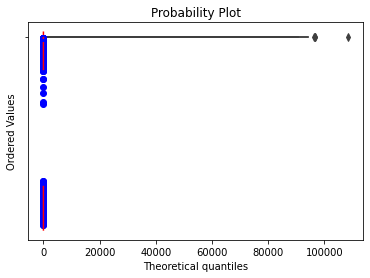

In [ ]:
############# Data Pre-processing ##############

################ Type casting #################
import pandas as pd

data = pd.read_csv("ethnic diversity.csv")
data.dtypes

help(data.astype)

# Convert 'float64' into 'int64' type. 
data.Salaries = data.Salaries.astype('int64')
data.dtypes

data.age = data.age.astype('float32')
data.dtypes

###############################################
### Identify duplicates records in the data ###
data = pd.read_csv("mtcars_dup.csv")

duplicate = data.duplicated()
duplicate
sum(duplicate)

# Removing Duplicates
data1 = data.drop_duplicates()

################################################
############## Outlier Treatment ###############
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("ethnic diversity.csv")
df.dtypes

# Let's find outliers in Salaries
sns.boxplot(df.Salaries)

sns.boxplot(df.age)
# No outliers in age column

# Detection of outliers (find limits for salary based on IQR)
IQR = df['Salaries'].quantile(0.75) - df['Salaries'].quantile(0.25)

lower_limit = df['Salaries'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Salaries'].quantile(0.75) + (IQR * 1.5)

############### 1. Remove (let's trim the dataset) ################
# Trimming Technique
# Let's flag the outliers in the data set
outliers_df = np.where(df['Salaries'] > upper_limit, True, np.where(df['Salaries'] < lower_limit, True, False))
df_trimmed = df.loc[~(outliers_df), ]
df.shape, df_trimmed.shape

# Let's explore outliers in the trimmed dataset
sns.boxplot(df_trimmed.Salaries)
# We see no outliers

############### 2. Replace ###############
# Replace the outliers by the maximum and minimum limit
df['df_replaced'] = pd.DataFrame(np.where(df['Salaries'] > upper_limit, upper_limit, np.where(df['Salaries'] < lower_limit, lower_limit, df['Salaries'])))
sns.boxplot(df.df_replaced)

############### 3. Winsorization ###############
# pip install feature_engine   # install the package
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Salaries'])

df_t = winsor.fit_transform(df[['Salaries']])

# Inspect the minimum caps and maximum caps 
# winsor.left_tail_caps_, winsor.right_tail_caps_

# Let's see boxplot
sns.boxplot(df_t.Salaries)

################################################
#### zero variance and near zero variance ######

# If the variance is low or close to zero, then a feature is approximately 
# constant and will not improve the performance of the model.
# In that case, it should be removed. 

df.var() # variance of numeric variables
df.var() == 0
df.var(axis=0) == 0


#################### Missing Values - Imputation ###########################
import numpy as np
import pandas as pd

# Load the dataset
# Use the modified ethnic dataset
df = pd.read_csv('modified ethnic.csv') # for doing modifications

# Check for count of NA's in each column
df.isna().sum()

# Create an imputer object that fills 'Nan' values
# Mean and Median imputer are used for numeric data (Salaries)
# Mode is used for discrete data (ex: Position, Sex, MaritalDesc)

# For Mean, Median, Mode imputation we can use Simple Imputer or df.fillna()
from sklearn.impute import SimpleImputer

# Mean Imputer 
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df["Salaries"] = pd.DataFrame(mean_imputer.fit_transform(df[["Salaries"]]))
df["Salaries"].isna().sum()

# Median Imputer
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df["age"] = pd.DataFrame(median_imputer.fit_transform(df[["age"]]))
df["age"].isna().sum()  # all 2 records replaced by median 

df.isna().sum()

# Mode Imputer
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df["Sex"] = pd.DataFrame(mode_imputer.fit_transform(df[["Sex"]]))
df["MaritalDesc"] = pd.DataFrame(mode_imputer.fit_transform(df[["MaritalDesc"]]))
df.isnull().sum()  # all Sex, MaritalDesc records replaced by mode

###########
# Discretization 

import pandas as pd
data = pd.read_csv("ethnic diversity.csv")
data.head()

data.describe()
data['Salaries_new'] = pd.cut(data['Salaries'], bins = [min(data.Salaries), 
                                                  data.Salaries.mean(), max(data.Salaries)], labels=["Low", "High"])
data.head(10)
data.Salaries_new.value_counts()
data.MaritalDesc.value_counts()

##################################################
################## Dummy Variables ###############
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt

# Use the ethinc diversity dataset
df = pd.read_csv("ethnic diversity.csv")

df.columns # column names
df.shape # will give u shape of the dataframe

# Drop emp_name column
df.drop(['Employee_Name', 'EmpID', 'Zip'], axis = 1, inplace = True)
df.dtypes

# Create dummy variables
df_new = pd.get_dummies(df)
df_new_1 = pd.get_dummies(df, drop_first = True)
# Created dummies for all categorical columns

##### One Hot Encoding works
df.columns
df = df[['Salaries', 'age', 'Position', 'State', 'Sex',
         'MaritalDesc', 'CitizenDesc', 'EmploymentStatus', 'Department', 'Race']]


from sklearn.preprocessing import OneHotEncoder
# Creating instance of One-Hot Encoder
enc = OneHotEncoder() # initializing method

enc_df = pd.DataFrame(enc.fit_transform(df.iloc[:, 2:]).toarray())


#######################
# Label Encoder
from sklearn.preprocessing import LabelEncoder

# Creating instance of labelencoder
labelencoder = LabelEncoder()

# Data Split into Input and Output variables
X = df.iloc[:,:]

X['Sex'] = labelencoder.fit_transform(X['Sex'])
X['MaritalDesc'] = labelencoder.fit_transform(X['MaritalDesc'])
X['CitizenDesc'] = labelencoder.fit_transform(X['CitizenDesc'])



#####################
# Normal Quantile-Quantile Plot

import pandas as pd

# Read data into Python
education = pd.read_csv("education.csv")

import scipy.stats as stats
import pylab

# Checking Whether data is normally distributed
stats.probplot(education.gmat, dist="norm", plot=pylab)

stats.probplot(education.workex, dist="norm", plot=pylab)

import numpy as np

# Transformation to make workex variable normal
stats.probplot(np.log(education.workex), dist="norm", plot=pylab)



####################################################
######## Standardization and Normalization #########
import pandas as pd
import numpy as np

### Standardization
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("mtcars.csv")

a = data.describe()
# Initialise the Scaler
scaler = StandardScaler()
# To scale data
df = scaler.fit_transform(data)
# Convert the array back to a dataframe
dataset = pd.DataFrame(df)
res = dataset.describe()


### Normalization
## load data set
ethnic = pd.read_csv("ethnic diversity.csv")
ethnic.columns
ethnic.drop(['Employee_Name', 'EmpID', 'Zip'], axis = 1, inplace = True)

a1 = ethnic.describe()

# Get dummies
ethnic = pd.get_dummies(ethnic, drop_first = True)

### Normalization function - Custom Function
# Range converts to: 0 to 1
def norm_func(i): 
    x = (i-i.min())/(i.max()-i.min())
    return(x)

df_norm = norm_func(ethnic)
b = df_norm.describe()






In [ ]:
IQR

28359.945

In [ ]:
lower_limit

-19446.9675

In [ ]:
upper_limit

93992.8125

In [ ]:
outliers_df

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Position            43
State               35
Sex                  0
MaritalDesc          0
CitizenDesc         27
EmploymentStatus    32
Department          18
Salaries             0
age                  0
Race                25
dtype: int64

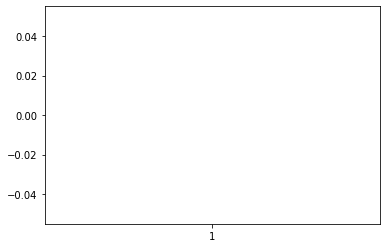

In [ ]:
#################### Missing Values - Imputation ###########################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load the dataset
# Use the modified ethnic dataset
df = pd.read_csv('modified ethnic.csv') # for doing modifications

# Check for count of NA's in each column
df.isna().sum()

# Create an imputer object that fills 'Nan' values
# Mean and Median imputer are used for numeric data (Salaries)
# Mode is used for discrete data (ex: Position, Sex, MaritalDesc)

# For Mean, Median, Mode imputation we can use Simple Imputer or df.fillna()
from sklearn.impute import SimpleImputer

plt.boxplot(df.Salaries)
# Mean Imputer 
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df["Salaries"] = pd.DataFrame(mean_imputer.fit_transform(df[["Salaries"]]))
df["Salaries"].isna().sum()

# Median Imputer
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df["age"] = pd.DataFrame(median_imputer.fit_transform(df[["age"]]))
df["age"].isna().sum()  # all 2 records replaced by median 

df.isna().sum()

# Mode Imputer
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df["Sex"] = pd.DataFrame(mode_imputer.fit_transform(df[["Sex"]]))
df["MaritalDesc"] = pd.DataFrame(mode_imputer.fit_transform(df[["MaritalDesc"]]))
df.isnull().sum()  # all Sex, MaritalDesc records replaced by mode

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


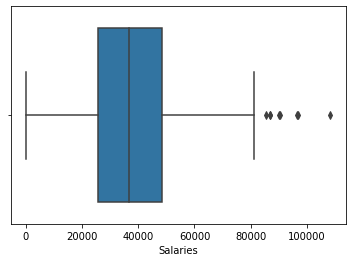

In [ ]:
sns.boxplot(df.Salaries)


In [ ]:
# Mean Imputer 
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df["Salaries"] = pd.DataFrame(median_imputer.fit_transform(df[["Salaries"]]))
df["Salaries"].isna().sum()

0

In [ ]:
# Median Imputer
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df["age"] = pd.DataFrame(mean_imputer.fit_transform(df[["age"]]))
df["age"].isna().sum()  # all 2 records replaced by median 

0

In [ ]:
# Mode Imputer
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df["Sex"] = pd.DataFrame(mode_imputer.fit_transform(df[["Sex"]]))
df["MaritalDesc"] = pd.DataFrame(mode_imputer.fit_transform(df[["MaritalDesc"]]))
df.isnull().sum()  # all Sex, MaritalDesc records replaced by mode

Position            43
State               35
Sex                  0
MaritalDesc          0
CitizenDesc         27
EmploymentStatus    32
Department          18
Salaries             0
age                  0
Race                25
dtype: int64

In [ ]:
##################################################
################## Dummy Variables ###############
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt

# Use the ethinc diversity dataset
df = pd.read_csv("ethnic diversity.csv")

df.columns # column names
df.shape # will give u shape of the dataframe

# Drop emp_name column
df.drop(['Employee_Name', 'EmpID', 'Zip'], axis = 1, inplace = True)
df.dtypes

# Create dummy variables
df_new = pd.get_dummies(df)
df_new_1 = pd.get_dummies(df, drop_first = True)
# Created dummies for all categorical columns

##### One Hot Encoding works
df.columns
df = df[['Salaries', 'age', 'Position', 'State', 'Sex',
         'MaritalDesc', 'CitizenDesc', 'EmploymentStatus', 'Department', 'Race']]


from sklearn.preprocessing import OneHotEncoder
# Creating instance of One-Hot Encoder
enc = OneHotEncoder() # initializing method

enc_df = pd.DataFrame(enc.fit_transform(df.iloc[:, 2:]).toarray())

In [ ]:
lower_limit = df['Salaries'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Salaries'].quantile(0.75) + (IQR * 1.5)

In [ ]:
###########
# Discretization 

import pandas as pd
data = pd.read_csv("ethnic diversity.csv")
data.head()

data.describe()
data['Salaries_new_new'] = pd.cut(data['Salaries'], bins = [min(data.Salaries),data['Salaries'].quantile(0.25), 
                                                  data['Salaries'].quantile(0.5),data['Salaries'].quantile(0.75), max(data.Salaries)], labels=["Low","Below Ave", "Above Ave", "High"])
data.head(10)
data.Salaries_new_new.value_counts()
# data.MaritalDesc.value_counts()

High         78
Low          77
Below Ave    77
Above Ave    77
Name: Salaries_new_new, dtype: int64

In [ ]:
##################################################
################## Dummy Variables ###############
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt

# Use the ethinc diversity dataset
df = pd.read_csv("ethnic diversity.csv")

df.columns # column names
df.shape # will give u shape of the dataframe

# Drop emp_name column
df.drop(['Employee_Name', 'EmpID', 'Zip'], axis = 1, inplace = True)
df.dtypes

# Create dummy variables
df_new = pd.get_dummies(df)
df_new_1 = pd.get_dummies(df, drop_first = True)
# Created dummies for all categorical columns

##### One Hot Encoding works
df.columns
df = df[['Salaries', 'age', 'Position', 'State', 'Sex',
         'MaritalDesc', 'CitizenDesc', 'EmploymentStatus', 'Department', 'Race']]


from sklearn.preprocessing import OneHotEncoder
# Creating instance of One-Hot Encoder
enc = OneHotEncoder() # initializing method

enc_df = pd.DataFrame(enc.fit_transform(df.iloc[:, 2:]).toarray())

In [ ]:
df_new.shape

(310, 89)

In [ ]:
df_new_1.shape

(310, 81)

In [ ]:
df.columns

Index(['Salaries', 'age', 'Position', 'State', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'EmploymentStatus', 'Department', 'Race'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Creating instance of One-Hot Encoder
enc = OneHotEncoder() # initializing method

enc_df = pd.DataFrame(enc.fit_transform(df.iloc[:, 2:]).toarray())

In [ ]:
enc_df

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#######################
# Label Encoder
from sklearn.preprocessing import LabelEncoder

# Creating instance of labelencoder
labelencoder = LabelEncoder()

# Data Split into Input and Output variables
X = df.iloc[:,:]

X['Sex'] = labelencoder.fit_transform(X['Sex'])
X['MaritalDesc'] = labelencoder.fit_transform(X['MaritalDesc'])
X['CitizenDesc'] = labelencoder.fit_transform(X['CitizenDesc'])

In [ ]:
ethnic.head()

,Salaries,age,Position_Administrative Assistant,Position_Area Sales Manager,Position_BI Developer,Position_BI Director,Position_CIO,Position_Data Analyst,Position_Data Analyst,Position_Data Architect,...,Department_Executive Office,Department_IT/IS,Department_Production,Department_Sales,Department_Software Engineering,Race_Asian,Race_Black or African American,Race_Hispanic,Race_Two or more races,Race_White
0,674.28,28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,674.28,50,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,674.28,43,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,47822.00,44,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,61089.35,33,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
### Normalization
## load data set
ethnic = pd.read_csv("ethnic diversity.csv")
ethnic.columns
ethnic.drop(['Employee_Name', 'EmpID', 'Zip'], axis = 1, inplace = True)

a1 = ethnic.describe()

# Get dummies
ethnic = pd.get_dummies(ethnic, drop_first = True)

### Normalization function - Custom Function
# Range converts to: 0 to 1
def norm_func(i): 
    x = (i-i.min())/(i.max()-i.min())
    return(x)

df_norm = norm_func(ethnic)
b = df_norm.describe()


In [ ]:
df_norm

,Salaries,age,Position_Administrative Assistant,Position_Area Sales Manager,Position_BI Developer,Position_BI Director,Position_CIO,Position_Data Analyst,Position_Data Analyst,Position_Data Architect,...,Department_Executive Office,Department_IT/IS,Department_Production,Department_Sales,Department_Software Engineering,Race_Asian,Race_Black or African American,Race_Hispanic,Race_Two or more races,Race_White
0,0.006226,0.161290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.006226,0.870968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.006226,0.645161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.441553,0.677419,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.564054,0.322581,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.347346,0.483871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
306,0.254866,0.354839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307,0.254722,0.032258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
308,0.111968,0.258065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df

,Salaries,age,Position,State,Sex,MaritalDesc,CitizenDesc,EmploymentStatus,Department,Race
0,674.28,28,Accountant I,MA,0,1,2,Active,Admin Offices,Black or African American
1,674.28,50,Accountant I,MA,1,0,2,Active,Admin Offices,Black or African American
2,674.28,43,Accountant I,MA,1,3,2,Active,Admin Offices,White
3,47822.00,44,Administrative Assistant,MA,0,1,2,Terminated for Cause,Admin Offices,White
4,61089.35,33,Administrative Assistant,MA,0,3,2,Active,Admin Offices,White
...,...,...,...,...,...,...,...,...,...,...
305,37619.01,38,Sr. Network Engineer,CT,0,1,2,Leave of Absence,IT/IS,White
306,27603.00,34,Sr. Network Engineer,MA,1,1,2,Leave of Absence,IT/IS,White
307,27587.46,24,Sr. Network Engineer,MA,1,1,2,Future Start,IT/IS,Asian
308,12126.53,31,Sr. Network Engineer,CT,1,3,2,Active,IT/IS,White
